In [1]:
from graph_tool.all import *
import pickle
import matplotlib
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import random
import math
import collections
import csv
import timeit

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

from functions_reci_bursty import *
from statistics import *

from AD_model_power_law import *

from multiprocessing import Process
from joblib import Parallel, delayed


path_code='/mnt/sdb1/sandeep/1.Reciprocity/code/'
path_data='/mnt/sdb1/sandeep/1.Reciprocity/data/'
path_results='/mnt/sdb1/sandeep/1.Reciprocity/res/'

In [4]:
ANTI_=0
def parallel_call_to_powerlaw_ADA(arg):
    

    N=500      # number of nodes in the empirical network 
    epsi=10**-3 # minimum allowed node activity
    E=5000;

    l_rec_vs_Gamma=[];E_rec_vs_Gamma=[];B_nodes_vs_Gamma=[];B_edges_vs_Gamma=[];

    storeGamma=np.linspace(-4,-2,21)
    #[-2,-2.2,-2.4,-2.6,-2.8,-3,-3.2,-3.4,-3.6,-3.8,-4];

    num_trials=1;

    for Gamma in storeGamma:
        g=Gamma+1
        print('Gamma=',Gamma,)

        temp_l_rec=[];temp_E_rec=[];temp_B_nodes=[];temp_B_edges=[];
        for trials in range(num_trials):



            # number of edges in the empirical network
            # CALL TO ACVITY DRIVEN MODEL, RETURN TIME ORDERED EDGELIST
            
            if ANTI_==0:
                elist,num_edges=create_AD_power_law_elist(N,E,epsi,g)
            else:
                elist,num_edges=create_ADAM_power_law_elist_anticorrelated(N,E,epsi,g)

            if Gamma==-1:
                elist_temp_gamma_minus1=elist

            Y=measures(pd.DataFrame(elist),'ADA MODEL');
            del elist
            temp_l_rec.append(Y.iloc[0,0])
            temp_E_rec.append(Y.iloc[0,1])
            temp_B_nodes.append(Y.iloc[0,2])
            temp_B_edges.append(Y.iloc[0,3])
    #         print('\n')

        l_rec_vs_Gamma.append(mean(temp_l_rec))
        E_rec_vs_Gamma.append(mean(temp_E_rec))
        B_nodes_vs_Gamma.append(mean(temp_B_nodes))
        B_edges_vs_Gamma.append(mean(temp_B_edges))
#         print(end='\r')
    print('\n')
    return l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma



In [5]:
# multiprocessing
# threading
actual_num_trials=5
arg_instances=list(np.arange(0,actual_num_trials,1))
results = Parallel(n_jobs=20,verbose=11,backend="threading")(
             map(delayed(parallel_call_to_powerlaw_ADA), arg_instances))

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


Gamma=Gamma= -4.0
 -4.0Gamma= -4.0
Gamma= -4.0
Gamma=
 -4.0
  edges n: 3676/4874Gamma= -3.9
  edges n: 4826/4826Gamma= -3.9
Gamma= -3.9
Gamma= -3.9
  edges n: 4740/4740Gamma= -3.9
  edges n: 4808/4808Gamma= -3.8
  edges n: 3950/4854 -3.8=
  edges n: 4639/4821Gamma= -3.8
  edges n: 4343/4805 -3.8=
  edges n: 4360/4805-3.8a=
  edges n: 430/4871-3.7a=
  edges n: 4871/4871Gamma= -3.7
  edges n: 4802/4802Gamma= -3.7
  edges n: 1727/4553Gamma= -3.7
  edges n: 2156/4553 -3.7=
  edges n: 3519/45533.6ma=
  edges n: 4325/4553Gamma= -3.6
  edges n: 1267/4836Gamma= -3.6
  edges n: 1292/4790-3.6a=
  edges n: 2595/4779.6mma=
  edges n: 4642/4838-3.5a=
  edges n: 2604/4786-3.5a=
  edges n: 2622/4786 -3.5=
  edges n: 3168/4797Gamma= -3.5
  edges n: 4797/4797Gamma= -3.5
  edges n: 3901/4801-3.4a=
  edges n: 4515/4781-3.4a=
  edges n: 4527/4781-3.4a=
  edges n: 4480/4772-3.4a=
  edges n: 4772/4772Gamma= -3.4
  edges n: 4623/4623Gamma= -3.3
  edges n: 3128/4724-3.3=
  edges n: 4328/4724-3.3a= 
  edges n:

/mnt/sdb1/sandeep/1.Reciprocity/codes/functions_reci_bursty.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return((std-mean)/(std+mean))


  edges n: 3085/4767Gamma= -3.2
  edges n: 4460/4767-3.2a=
  edges n: 716/48022-3.1a=
  edges n: 3545/45423.2ma=
  edges n: 2148/4802Gamma= -3.2
  edges n: 1653/4775 -3.1=
  edges n: 2577/4790-3.0a=
  edges n: 2159/4690Gamma= -3.1
  edges n: 2338/4690-3.1a=
  edges n: 3155/46903.1ma=
  edges n: 423/4746Gamma= -3.0
  edges n: 2772/4746Gamma= -2.9
  edges n: 261/4774-3.0a=
  edges n: 1368/3131-3.0a=
  edges n: 1609/3131-2.8a=
  edges n: 1895/3131Gamma= -2.9
  edges n: 2754/3131 -2.9=
  edges n: 3131/3131Gamma= -3.0
  edges n: 1891/4746-2.9a=
  edges n: 3530/4746-2.7a=
  edges n: 4535/4746Gamma= -2.8
  edges n: 1650/4562 -2.9=
  edges n: 1806/4562Gamma= -2.8
  edges n: 4562/4562Gamma= -2.8
  edges n: 4413/4413Gamma= -2.5999999999999996
  edges n: 1475/4430 -2.7=
  edges n: 4268/4389-2.8a=
  edges n: 4337/4526-2.5a=
  edges n: 4529/4569Gamma= -2.7
  edges n: 4569/4569Gamma= -2.7
  edges n: 29/4491Gamma= -2.5999999999999996
  edges n: 1795/4480-2.5999999999999996
  edges n: 581/38020-2.5999

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed: 10.7min


  edges n: 1650/2028Gamma= -2.0999999999999996
  edges n: 101/32238

  edges n: 109/3223

[Parallel(n_jobs=20)]: Done   2 out of   5 | elapsed: 10.8min remaining: 16.2min


  edges n: 3223/3223

  edges n: 11/2361

[Parallel(n_jobs=20)]: Done   3 out of   5 | elapsed: 10.9min remaining:  7.3min


  edges n: 1988/3871 -2.0=
  edges n: 3871/3871Gamma= -2.0
  edges n: 502/25694

  edges n: 2569/2569



[Parallel(n_jobs=20)]: Done   5 out of   5 | elapsed: 11.5min remaining:    0.0s
[Parallel(n_jobs=20)]: Done   5 out of   5 | elapsed: 11.5min finished


In [6]:
file_name = path_results+'results_ADA_trials_anti'+str(ANTI_)+'_'+str(actual_num_trials)+'.pkl'
open_file = open(file_name, "wb")
pickle.dump(results, open_file)
open_file.close()


In [7]:
# file_name

In [8]:
l_rec_vs_Gamma=[];
E_rec_vs_Gamma=[];
B_nodes_vs_Gamma=[];
B_edges_vs_Gamma=[]
cc=0
for xx in results:
    a,b,c,d=xx
    cc=cc+1
    print(cc)
    l_rec_vs_Gamma.append(a);
    E_rec_vs_Gamma.append(b)
    B_nodes_vs_Gamma.append(c)
    B_edges_vs_Gamma.append(d)
# a,b,c,d=try1
# l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma
# l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma=try2

# =
# l_rec_vs_Gamma

1
2
3
4
5


In [9]:
mean_a=np.mean(np.array(l_rec_vs_Gamma),0)
mean_b=np.mean(np.array(E_rec_vs_Gamma),0)
mean_c=np.mean(np.array(B_nodes_vs_Gamma),0)
mean_d=np.mean(np.array(B_edges_vs_Gamma),0)
storeGamma=np.linspace(-4,-2,21)

with open(path_results+'results_ADA_storeGamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_a)
with open(path_results+'results_ADA_E_rec_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_b)
with open(path_results+'results_ADA_B_nodes_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_c)
with open(path_results+'results_ADA_B_edges_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_d)
with open(path_results+'results_ADA_storeGamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, storeGamma)    


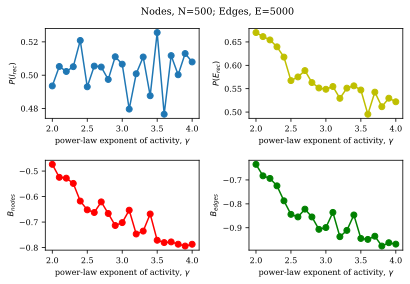

In [10]:
#PLOTTING behaviour as a function of number of Gamma
storeGamma=np.linspace(-4,-2,21)

x=storeGamma;
x =  [abs(ele) for ele in x]

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)

y=mean_a;
axs[0, 0].plot(x, y,'o-')
# plt.xlabel('number of edges, E');plt.ylabel('$P(l_{rec})$');

# axs[0, 0].set_title('Axis [0, 0]')

y=mean_b;
axs[0, 1].plot(x, y,'yo-')
# axs[0, 1].set_title('Axis [0, 1]')

y=mean_c;
axs[1, 0].plot(x, y,'ro-')
# axs[1, 0].set_title('Axis [1, 0]')

y=mean_d;
axs[1, 1].plot(x, y,'go-')
# axs[1, 1].set_title('Axis [1, 1]')

i=0;labels_=['P(l_{rec})','P(E_{rec})','B_{nodes}','B_{edges}'];
fig.suptitle('Nodes, N=500; Edges, E=5000')

for ax in axs.flat:

    ax.set(xlabel='power-law exponent of activity, $\gamma$', ylabel='$'+labels_[i]+'$');i=i+1;
plt.savefig(path_results+'fig_ADA_measures_VS_gammaE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.pdf')


In [ ]:
# N=500      # number of nodes in the empirical network 
# epsi=10**-3 # minimum allowed node activity
# E=5000;
# Gamma=-1.1
# g=Gamma+1

# elist,num_edges=create_AD_power_law_elist(N,E,epsi,g)

In [ ]:
# elist